In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline 

import tensorflow as tf
from sklearn import preprocessing

import random
tf.random.set_seed(53)
random.seed(53)

In [2]:
BASE="../input/competitive-data-science-predict-future-sales/"
item_cat = pd.read_csv(BASE+"item_categories.csv")
item = pd.read_csv(BASE+"items.csv")
sales_train = pd.read_csv(BASE+"sales_train.csv")
shops = pd.read_csv(BASE+"shops.csv")
sales_test = pd.read_csv(BASE+"test.csv")

In [3]:
def basic_eda(df):
    print("----------TOP 5 RECORDS--------")
    print(df.head(5))
    print("----------INFO-----------------")
    print(df.info())
    print("----------Describe-------------")
    print(df.describe())
    print("----------Columns--------------")
    print(df.columns)
    print("----------Data Types-----------")
    print(df.dtypes)
    print("-------Missing Values----------")
    print(df.isnull().sum())
    print("-------NULL values-------------")
    print(df.isna().sum())
    print("-----Shape Of Data-------------")
    print(df.shape)

In [4]:
print("=============================Sales Data=============================")
basic_eda(sales_train)

=============================Sales Data=============================
----------TOP 5 RECORDS--------
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None
----------

In [5]:
print("=============================Test data=============================")
basic_eda(sales_test)

=============================Test data=============================
----------TOP 5 RECORDS--------
   ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268
----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB
None
----------Describe-------------
                  ID        shop_id        item_id
count  214200.000000  214200.000000  214200.000000
mean   107099.500000      31.642857   11019.398627
std     61834.358168      17.561933    6252.644590
min         0.000000       2.000000      30.000000
25%     53549.750000      16.000000    5381.500000
50%    107099.500000      34.500000   11203.0000

In [6]:
print("=============================Item Categories=============================")
basic_eda(item_cat)

=============================Item Categories=============================
----------TOP 5 RECORDS--------
        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4
----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB
None
----------Describe-------------
       item_category_id
count         84.000000
mean          41.500000
std           24.392622
min            0.000000
25%           20.750000
50%           41.500000
75%           62.250000
max           83.00

In [7]:
print("=============================Items=============================")
basic_eda(item)

=============================Items=============================
----------TOP 5 RECORDS--------
                                           item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40  
----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int

In [8]:
print("=============================Shops=============================")
basic_eda(shops)

=============================Shops=============================
----------TOP 5 RECORDS--------
                        shop_name  shop_id
0   !Якутск Орджоникидзе, 56 фран        0
1   !Якутск ТЦ "Центральный" фран        1
2                Адыгея ТЦ "Мега"        2
3  Балашиха ТРК "Октябрь-Киномир"        3
4        Волжский ТЦ "Волга Молл"        4
----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
----------Describe-------------
         shop_id
count  60.000000
mean   29.500000
std    17.464249
min     0.000000
25%    14.750000
50%    29.500000
75%    44.250000
max    59.000000
----------Columns--------------
Index(['shop_name', 'shop_id'], dtype='object')
----------Data Types-----------
shop

# EDA

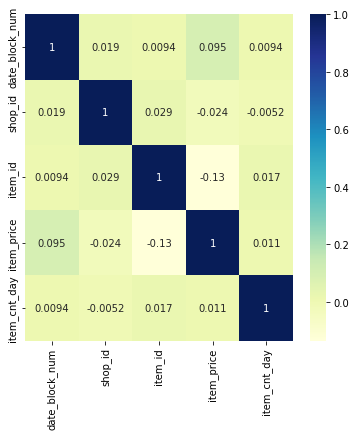

In [9]:
corr = sales_train.corr()
top_corr_features = corr.index[abs(corr["item_cnt_day"])>0]

plt.figure(figsize=(6,6))
g=sns.heatmap(sales_train[top_corr_features].corr(),annot=True,cmap="YlGnBu")

<AxesSubplot:xlabel='shop_id', ylabel='item_cnt_day'>

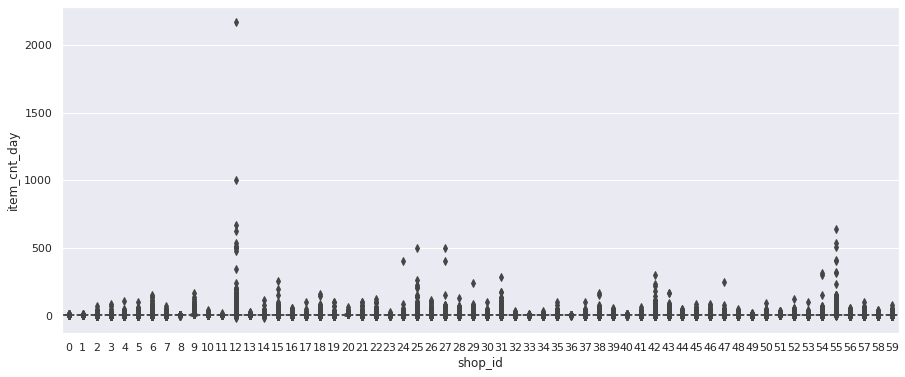

In [10]:
sns.set(rc={'figure.figsize':(15,6)})
sns.boxplot(x='shop_id', y='item_cnt_day', data=sales_train)

<AxesSubplot:xlabel='date_block_num', ylabel='item_cnt_day'>

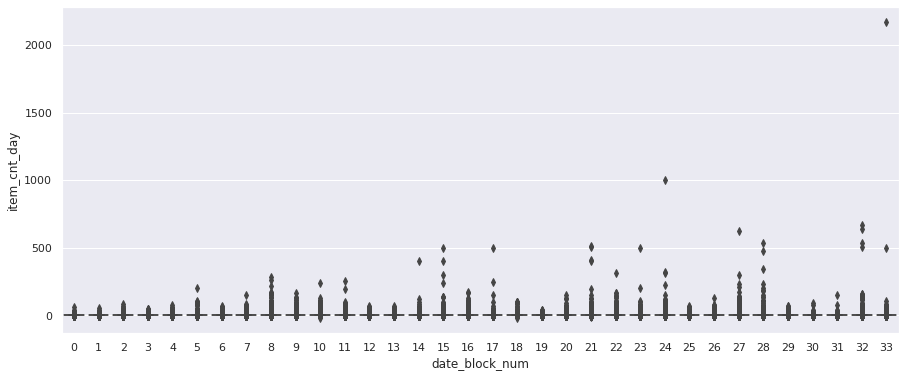

In [11]:
sns.set(rc={'figure.figsize':(15,6)})
sns.boxplot(x='date_block_num', y='item_cnt_day', data=sales_train)

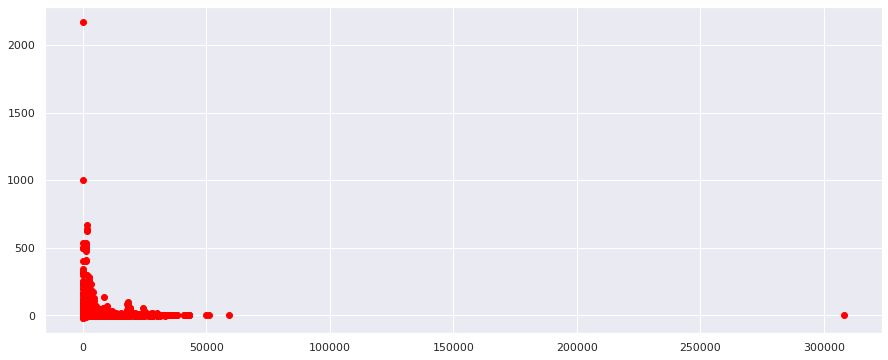

In [12]:
plt.scatter(sales_train['item_price'], sales_train['item_cnt_day'], color = "red")
plt.show()

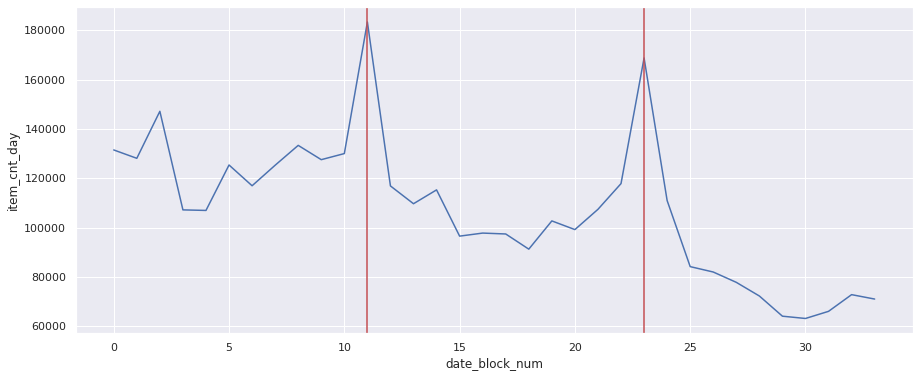

In [13]:
df = sales_train.groupby(['date_block_num'],as_index=False).sum()
df.head()
sns.set(rc={'figure.figsize':(15,6)})
sns.lineplot(x='date_block_num', y='item_cnt_day', data=df)
plt.axvline(x=11, ymin=0,ymax=1, color ='r')
plt.axvline(x=23, ymin=0,ymax=1, color ='r')

<AxesSubplot:xlabel='shop_id', ylabel='item_cnt_day'>

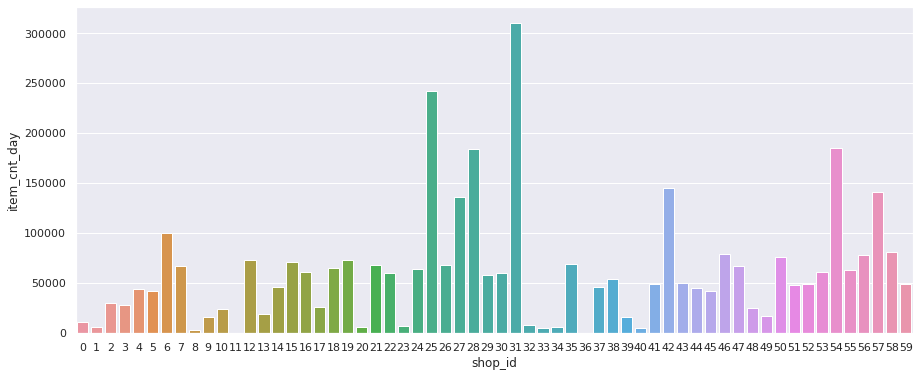

In [14]:
df_s = sales_train.groupby(['shop_id'],as_index=False).sum().sort_values("item_cnt_day", ascending=False)
sns.set(rc={'figure.figsize':(15,6)})
sns.barplot(x='shop_id', y='item_cnt_day', data=df_s)

<AxesSubplot:xlabel='item_price', ylabel='item_cnt_day'>

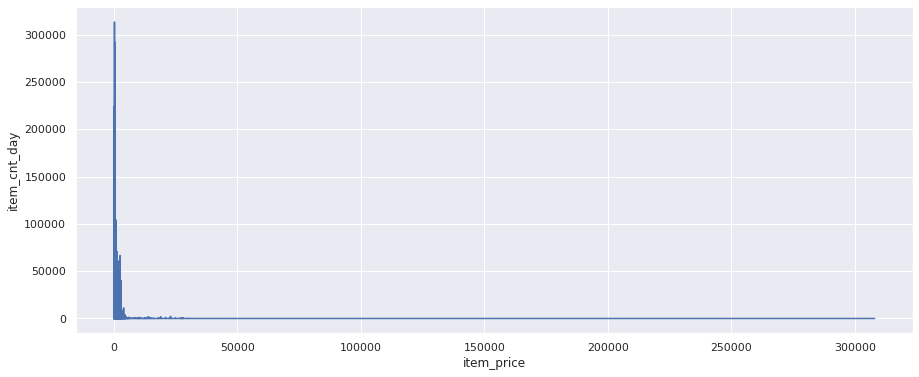

In [15]:
df_p = sales_train.groupby(['item_price'],as_index=False).sum()
sns.set(rc={'figure.figsize':(15,6)})
sns.lineplot(x='item_price', y='item_cnt_day', data=df_p)

# Feature Engineering

Lets start removing outliers first.

In [16]:
sales_train = sales_train[sales_train['item_price'] < 50000]

In [17]:
sales_train = sales_train[sales_train['item_cnt_day'] < 1000]

In [18]:
print(sum(item.duplicated(['item_name'])))
print(sum(item_cat.duplicated(['item_category_name'])))
print(sum(shops.duplicated(['shop_name'])))

0
0
0


In [19]:
new_shop_id = {11: 10, 0: 57, 1: 58}
shops['shop_id'] = shops['shop_id'].apply(lambda x: new_shop_id[x] if x in new_shop_id.keys() else x)
sales_train['shop_id'] = sales_train['shop_id'].apply(lambda x: new_shop_id[x] if x in new_shop_id.keys() else x)

In [20]:
sales = pd.merge(sales_test, sales_train, on = ('shop_id', 'item_id'), how = 'left')

In [21]:
def missing_percent_of_column(train_set):
    nan_percent = 100*(train_set.isnull().sum()/len(train_set))
    nan_percent = nan_percent[nan_percent>0].sort_values(ascending=False).round(1)
    DataFrame = pd.DataFrame(nan_percent)
    # Rename the columns
    mis_percent_table = DataFrame.rename(columns = {0 : '% of Misiing Values'}) 
    # Sort the table by percentage of missing descending
    mis_percent = mis_percent_table
    return mis_percent

In [22]:
print('Missing sales details:')
miss_sales = missing_percent_of_column(sales)
miss_sales

Missing sales details:


,% of Misiing Values
date,7.7
date_block_num,7.7
item_price,7.7
item_cnt_day,7.7


In [23]:
# lets fill all NaN values with 0
sales.fillna(0,inplace = True)
# lets check our data now 
sales.head()

,ID,shop_id,item_id,date,date_block_num,item_price,item_cnt_day
0,0,5,5037,21.09.2014,20.0,2599.0,1.0
1,0,5,5037,29.11.2014,22.0,2599.0,1.0
2,0,5,5037,28.12.2014,23.0,1999.0,1.0
3,0,5,5037,20.12.2014,23.0,1999.0,1.0
4,0,5,5037,02.01.2015,24.0,1999.0,1.0


In [24]:
sales.shape

(1330516, 7)

In [25]:
print(sum(sales.duplicated()))

5


We have duplicate records added after merging data, so we are handling duplicate record below way,
1. Remove all duplicate records for all column level.
1. We will take column **date, date_block_num, shop_id, item_id, item_cnt_day** as unique records, and delete duplicate records.
1. Now lets take column **ID, date, date_block_num** as unique also, and delete duplicate records.

In [26]:
sales = sales.drop_duplicates()
sales = sales.drop_duplicates(['date','date_block_num','shop_id','item_id','item_cnt_day'])
sales = sales.drop_duplicates(['ID','date','date_block_num'])
sales.shape

(1330504, 7)

In [27]:
sales.describe()

,ID,shop_id,item_id,date_block_num,item_price,item_cnt_day
count,1.330504e+06,1.330504e+06,1.330504e+06,1.330504e+06,1.330504e+06,1.330504e+06
mean,9.659824e+04,3.218155e+01,9.733679e+03,1.782029e+01,9.500202e+02,1.216492e+00
std,5.720863e+04,1.660457e+01,6.317144e+03,1.018583e+01,1.774651e+03,2.438183e+00
min,0.000000e+00,2.000000e+00,3.000000e+01,0.000000e+00,0.000000e+00,-1.600000e+01
25%,4.800200e+04,1.900000e+01,4.190000e+03,1.000000e+01,2.490000e+02,1.000000e+00
50%,8.957300e+04,3.100000e+01,7.895000e+03,1.900000e+01,4.990000e+02,1.000000e+00
75%,1.425700e+05,4.700000e+01,1.526700e+04,2.600000e+01,1.149000e+03,1.000000e+00
max,2.141990e+05,5.900000e+01,2.216700e+04,3.300000e+01,4.299000e+04,6.240000e+02


In [28]:
sales.loc[sales.item_cnt_day < 0, 'item_cnt_day'] = -1. * sales.loc[sales.item_cnt_day < 0, 'item_cnt_day']

In [29]:
sales_month = sales.sort_values('date_block_num').groupby(['ID', 'date_block_num'], as_index = False).agg({'item_cnt_day': ['sum']})
sales_month.columns = ['ID', 'date_block_num', 'item_cnt_month']
sales_month.sample(10)

,ID,date_block_num,item_cnt_month
207782,57085,3.0,21.0
288339,77310,12.0,2.0
518503,144157,15.0,1.0
19761,6300,33.0,2.0
654301,193886,22.0,3.0
377877,103922,6.0,1.0
585089,169678,24.0,1.0
4985,1059,2.0,3.0
679765,202897,19.0,1.0
300804,81600,23.0,9.0


In [30]:
sales_month.describe()

,ID,date_block_num,item_cnt_month
count,704477.000000,704477.000000,704477.000000
mean,100635.117371,17.184611,2.306102
std,58978.682846,11.058803,10.048267
min,0.000000,0.000000,0.000000
25%,49740.000000,7.000000,1.000000
50%,97967.000000,19.000000,1.000000
75%,146964.000000,27.000000,2.000000
max,214199.000000,33.000000,1305.000000


In [31]:
def to_IDs(np_data, col_ID):
    # np_data - sales converted to numpy array
    # col_ID - name of ID column
    sales_by_ID = list()
    IDs = np.unique(np_data[:,col_ID]).astype(int)
    for i in IDs:
        positions = np_data[:,col_ID] == i
        sales_ID = np_data[positions,1:]
        sales_by_ID.append(sales_ID)
    return sales_by_ID, IDs

In [32]:
sales_by_id, id_list = to_IDs(sales_month.values,0)
print(len(sales_by_id))

214200


In [33]:
# to decrease calculation time during a code debugging we remove IDs that don't have observtions for last months
def remove_ID_nan_last_year(np_data):
    N_IDs = len(np_data)
    col_date = 0
    clear_data = list()
    cut_month = 33 - 2
    for i in range(N_IDs):
        ID_data = np_data[i]
        if len(ID_data[ID_data[:,col_date] >= cut_month,1]) != 0:
            clear_data.append(ID_data)
    return clear_data

In [34]:
# Let's fill the missing date_block_num by NaN for paticular ID
def missing_months(np_data, col_date, col_TS, N_months = 34):
    # col_date - index of date_block_num column
    # col_TS - index of item_price column and item_cnt_month column
    # at first fill time series by NaN for all months
    series = [np.nan for _ in range(N_months)]
    for i in range(len(np_data)):
        position = int(np_data[i, col_date] - 1)
        # fill positions that present in data
        series[position] = np_data[i, col_TS]
    return series

In [35]:
# Let's fill the missing item_cnt_month and item_price for particular ID
def to_fill_missing(np_data, N_months = 34):
    col = ['date_block_num','item_cnt_month']
    sales_ID = pd.DataFrame(np_data, columns = col)
    if sales_ID.shape[0] < N_months:
        date_month = pd.DataFrame(range(N_months),columns = ['date_block_num'])
        sales_ID = pd.merge(date_month, sales_ID, on = ('date_block_num'), how = 'left')
        sales_ID = sales_ID.reindex(columns = col)
        sales_ID['item_cnt_month'] = sales_ID['item_cnt_month'].fillna(0.0)
    return sales_ID['item_cnt_month'].to_numpy()

In [36]:
# Plot time series for particular ID to find out missing months
def plot_TS(np_data, n_vars = 1, N_months = 34, flag = 0):
    # n_vars = 1 or 2 (plot item_cnt OR item_cnt and item_price)
    plt.figure()
    if flag == 1:
        TSs = to_fill_missing(np_data, N_months)
    for i in range(n_vars):
        col_plot = i + 1 # index of column to plot
        if flag == 1:
            series = TSs#[:,col_plot]
        else:
            series = missing_months(np_data, 0, col_plot, N_months)
        ax = plt.subplot(n_vars, 1, i+1)
        plt.plot(series, 'o')
        plt.plot(series)
    plt.show()

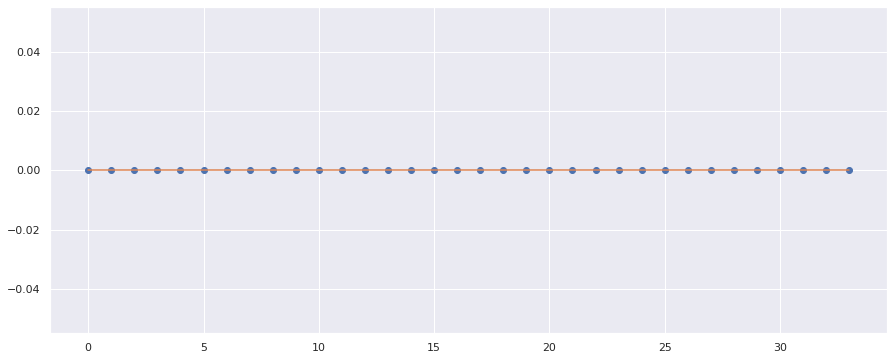

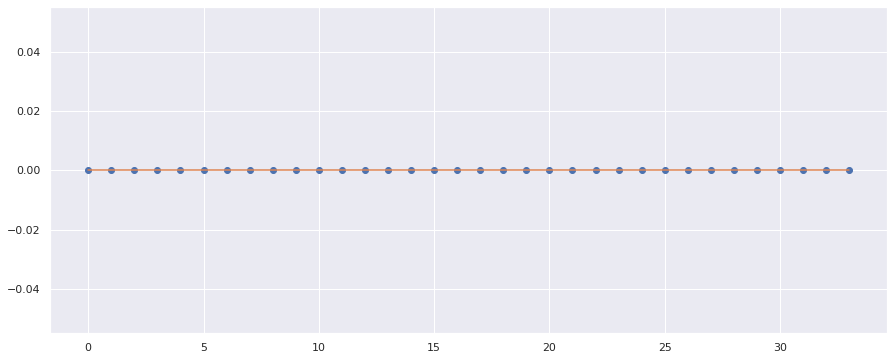

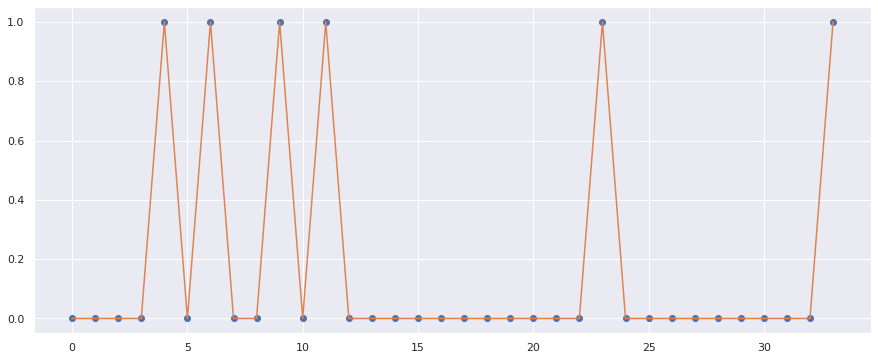

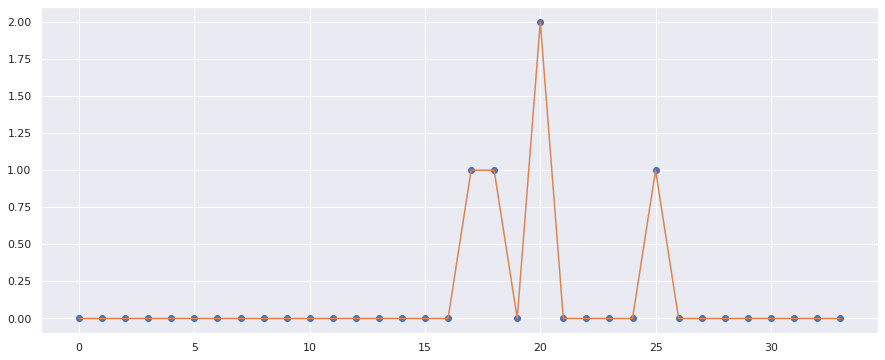

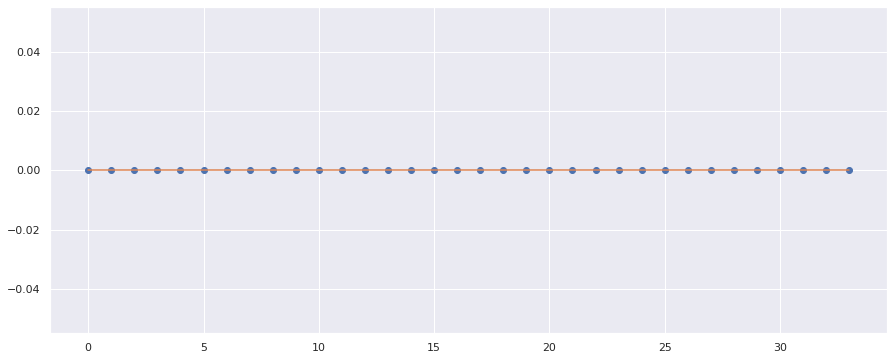

In [37]:
for i in np.random.randint(0, len(sales_by_id), 5):
    plot_TS(sales_by_id[i], flag = 1)

In [38]:
# Let's create 2D-array and each column is counts of particular ID where missing months is filled
def full_data(data, N_months = 34):
    N_IDs = len(data)
    TS = np.empty((N_months, N_IDs))
    for i in range(N_IDs):
        TS[:, i] = to_fill_missing(data[i], N_months)
    return TS

In [39]:
TS = full_data(sales_by_id)
TS.shape

(34, 214200)

In [40]:
val_month = 29
valid_TS = TS[val_month:,:]
train_TS = TS[:val_month,:]

print(train_TS.shape, valid_TS.shape)

(29, 214200) (5, 214200)


In [41]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(TS)

train_scaled = scaler.transform(train_TS)
valid_scaled = scaler.transform(valid_TS)

# Model Training

In [42]:
def to_make_features(TS, n_lag, batch_size):
    ds = tf.data.Dataset.from_tensor_slices(TS) # each element of dataset is one value of TS 
    ds = ds.window(n_lag+1, shift = 1, drop_remainder = True) # (n_lag+1)-elements of dataset is combined to window
    ds = ds.flat_map(lambda row: row.batch(n_lag + 1)) # to batch elements in window to tensor (one element) and to flat (now there are no windows)
    # Let's shuffle befor we combine batches for epoch
    ds = ds.shuffle(300)
    # make the tuple: first element is features, second element is labels
    # features-(1,2,3) and labels-(2,3,4). 2 goes after 1, 3 goes after 2, 4 goes after 3.
    ds = ds.map(lambda row: (row[:-1,:], row[1:,:]))
    # combine tuples to banch for gradient descent
    # instead of a row we will have a matrix in every tuple
    ds = ds.batch(batch_size).prefetch(1)
    return ds

In [43]:
n_lag = 6
batch_size = 8
features = to_make_features(train_scaled, n_lag, batch_size)
val_features = to_make_features(valid_scaled, n_lag, batch_size)
Conv_filters = 64
Conv_kernel_size = 4
LSTM_filters = 64
n_outputs = train_scaled.shape[1]


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [44]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters = Conv_filters, kernel_size = Conv_kernel_size,
                      strides=1, padding="causal", activation="relu", input_shape=[None, n_outputs]),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(LSTM_filters, return_sequences=True)),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(LSTM_filters, return_sequences=True)),
  tf.keras.layers.Dropout(rate=0.2),
    
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(LSTM_filters, return_sequences=True)),
  tf.keras.layers.Dense(n_outputs)])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-5 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-5)

model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer, metrics=["mean_squared_error"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 64)          54835264  
_________________________________________________________________
dropout (Dropout)            (None, None, 64)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 128)         0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         98816     
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 128)         0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 128)         9

2022-05-04 09:49:11.017499: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


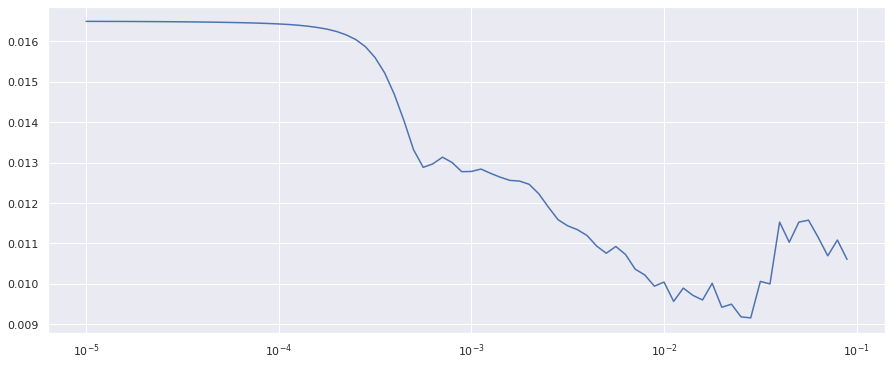

In [45]:
fitting = model.fit(features, epochs=80,verbose=0, callbacks=[lr_schedule])
plt.semilogx(fitting.history["lr"], fitting.history["loss"])

In [46]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-2)
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer, metrics=["mae"])
fitting = model.fit(features, epochs=300, verbose = 0, validation_data = val_features)

In [47]:
def model_forecast(model, TS, n_lag, batch_size):
    ds = tf.data.Dataset.from_tensor_slices(TS)
    ds = ds.window(n_lag, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda row: row.batch(n_lag))
    ds = ds.batch(batch_size)
    forecast = model.predict(ds)
    return forecast

In [48]:
forecast = model_forecast(model, train_scaled, n_lag, batch_size)
forecast = forecast[:,-1,:]
forecast = scaler.inverse_transform(forecast)

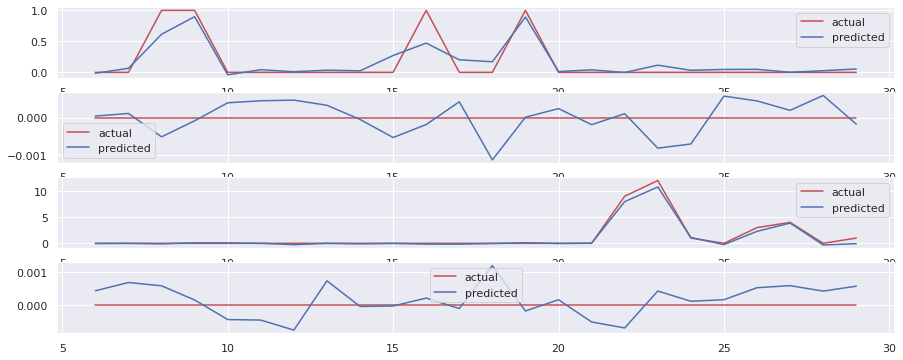

In [49]:
iplot = 0
for i in np.random.randint(0, n_outputs, 4):
    iplot += 1
    plt.subplot(4,1,iplot)
    plt.plot(range(n_lag, val_month+1), np.append(train_TS[n_lag:,i],valid_TS[0,i]), 'r')
    plt.plot(range(n_lag, val_month+1), forecast[:,i], 'b')
    plt.legend(["actual", "predicted"])

In [50]:
ds = tf.data.Dataset.from_tensor_slices(TS)
ds = ds.window(n_lag, shift=1, drop_remainder=True)
ds = ds.flat_map(lambda row: row.batch(n_lag))
ds = ds.batch(batch_size)
predict = model.predict(ds)
last_month_predict = predict[-1,-1,:]
last_month_forecast = scaler.inverse_transform(np.expand_dims(last_month_predict, axis = 0))

In [51]:
submission = pd.DataFrame({'ID': id_list, 'item_cnt_month': np.squeeze(last_month_predict) })
submission.loc[submission.item_cnt_month < 0, 'item_cnt_month'] = 0
submission = pd.merge(sales_test.ID, submission, on = ('ID'), how = 'left')
submission = submission.fillna(0)
submission.head()

,ID,item_cnt_month
0,0,0.045052
1,1,0.000393
2,2,0.015879
3,3,0.000000
4,4,0.000000


In [52]:
submission.to_csv('submission.csv', index=False)